# TASK 2: MOVIE RATING PREDICTION WITH PYTHON
Done by: Safura Motala

Batch: NOV BATCH A17

Domain: Data Science

Aim: Analyze historical movie data and develop a model that accurately estimates the rating given to a movie by users or
critics.

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
movies=pd.read_csv("movie_ratings.csv", encoding='latin-1')

In [3]:
movies.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
movies.dtypes

Name         object
Year        float64
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [5]:
movies.shape

(15509, 10)

In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


In [7]:
movies.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [8]:
movies.describe()

,Year,Rating
count,14981.000000,7919.000000
mean,-1987.012215,5.841621
std,25.416689,1.381777
min,-2022.000000,1.100000
25%,-2009.000000,4.900000
50%,-1991.000000,6.000000
75%,-1968.000000,6.800000
max,-1913.000000,10.000000


# Data Cleaning and Handling Missing Values 

In [9]:
# Drop rows without ratings since we want to predict ratings
movies = movies.dropna(subset=['Rating'])

In [10]:
#Imputing missing values with median and converting Year to mumeric
movies['Year'] = movies['Year'].abs().astype(int)
movies['Year'].fillna(movies['Year'].median(), inplace=True)

# Extracting the numeric part of the 'Duration' column and converting to integer
movies['Duration'] = movies['Duration'].str.extract('(\d+)').astype(float).astype('Int64')

# Imputing the missing values of 'Duration' with the median
movies['Duration'].fillna(movies['Duration'].median(), inplace=True)


In [11]:
#Imputing missing values with a placeholder
movies['Genre'].fillna('Unknown', inplace=True)
movies['Director'].fillna('Unknown', inplace=True)
movies[['Actor 1', 'Actor 2', 'Actor 3']] = movies[['Actor 1', 'Actor 2', 'Actor 3']].fillna('Unknown')


In [12]:
#Converting the Votes column to numeric and Imputing missing values with the median of the column.
movies['Votes'] = pd.to_numeric(movies['Votes'].str.replace(',', ''), errors='coerce')
movies['Votes'].fillna(movies['Votes'].median(), inplace=True)


In [13]:
#Dropping unnesessary column
movies.drop(['Name'],axis=1,inplace=True)

# Data Visualisation

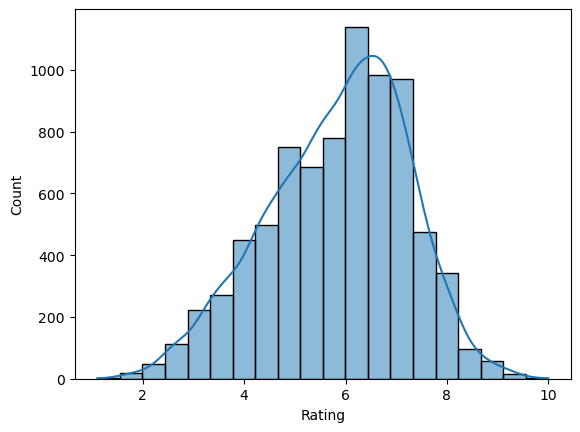

In [14]:
sns.histplot(movies['Rating'], bins=20, kde=True)
plt.show()

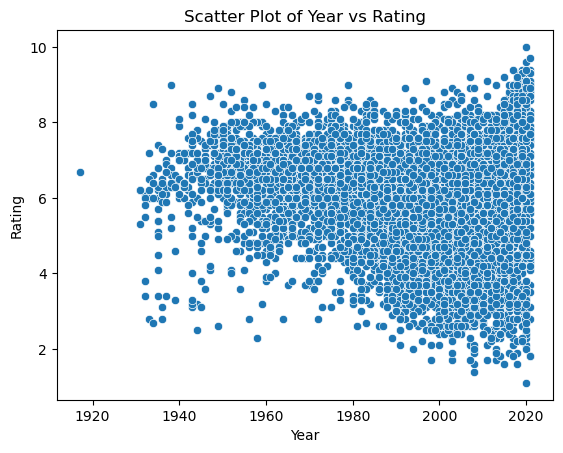

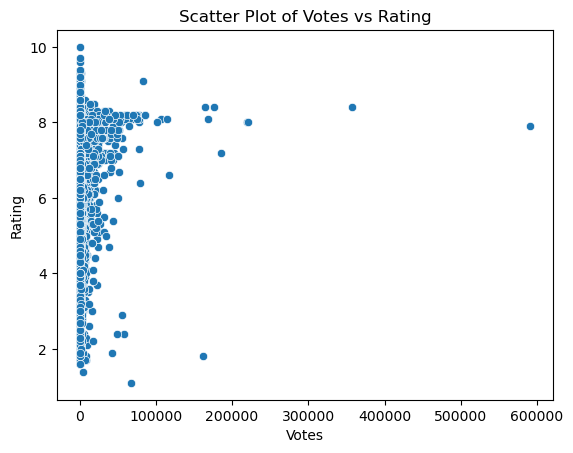

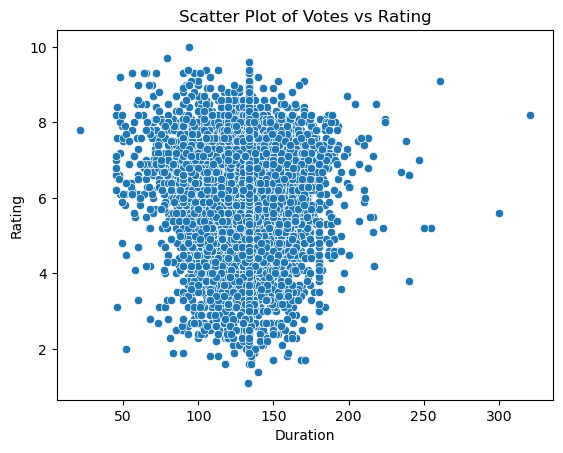

In [15]:
sns.scatterplot(x='Year', y='Rating', data=movies)
plt.title('Scatter Plot of Year vs Rating')
plt.show()

sns.scatterplot(x='Votes', y='Rating', data=movies)
plt.title('Scatter Plot of Votes vs Rating')
plt.show()

sns.scatterplot(x='Duration', y='Rating', data=movies)
plt.title('Scatter Plot of Votes vs Rating')
plt.show()

In [16]:
#Converting all values to numeric 
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
movies['Director']=label_encoder.fit_transform(movies['Director'])
movies['Actor 1']=label_encoder.fit_transform(movies['Actor 1'])
movies['Actor 2']=label_encoder.fit_transform(movies['Actor 2'])
movies['Actor 3']=label_encoder.fit_transform(movies['Actor 3'])
movies['Genre']=label_encoder.fit_transform(movies['Genre'])
movies

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109,268,7.0,8,811,1782,2815,377
3,2019,110,207,4.4,35,1749,1589,890,2572
5,1997,147,177,4.7,827,2005,508,85,2449
6,2005,142,331,7.4,1086,2643,931,1388,3030
8,2012,82,367,5.6,326,174,2521,1461,1205
...,...,...,...,...,...,...,...,...,...
15501,1992,134,28,5.3,135,500,631,1436,868
15503,1989,125,28,5.8,44,2339,550,936,2014
15504,1988,134,0,4.6,11,1418,1405,2536,2725
15505,1999,129,38,4.5,655,1338,145,2670,371


In [17]:
movies.describe()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,7919.000000,7919.0,7919.000000,7919.000000,7919.000000,7919.000000,7919.000000,7919.000000,7919.000000
mean,1993.321758,132.739866,200.594141,5.841621,1938.520394,1566.922591,1296.656901,1498.472534,1576.131835
std,20.463770,22.838302,131.001157,1.381777,11602.415952,883.237051,733.103335,829.729488,878.682207
min,1917.000000,21.0,0.000000,1.100000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,1979.500000,124.0,49.000000,4.900000,16.000000,828.000000,643.500000,800.500000,826.500000
50%,1997.000000,134.0,223.000000,6.000000,55.000000,1545.000000,1304.000000,1510.000000,1609.000000
75%,2011.000000,143.0,298.500000,6.800000,404.000000,2317.000000,1961.000000,2217.500000,2335.000000
max,2021.000000,321.0,432.000000,10.000000,591417.000000,3139.000000,2551.000000,2873.000000,3064.000000


In [18]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7919 entries, 1 to 15508
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      7919 non-null   int32  
 1   Duration  7919 non-null   Int64  
 2   Genre     7919 non-null   int32  
 3   Rating    7919 non-null   float64
 4   Votes     7919 non-null   int64  
 5   Director  7919 non-null   int32  
 6   Actor 1   7919 non-null   int32  
 7   Actor 2   7919 non-null   int32  
 8   Actor 3   7919 non-null   int32  
dtypes: Int64(1), float64(1), int32(6), int64(1)
memory usage: 440.8 KB


In [19]:
#Splitting the data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
X = movies.drop(['Rating'], axis=1)
y = movies['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((6335, 8), (1584, 8), (6335,), (1584,))

# Model Training, Testing and Evaluation 

In [21]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_train, y_train)
predict=model.predict(X_test)
predict

array([6.859, 4.545, 5.476, ..., 6.428, 6.643, 4.986])

In [22]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,predict)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.2882887916666668


In [23]:
from sklearn.metrics import mean_absolute_error, r2_score

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test,predict))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test,predict)
print(f'Mean Absolute Error (MAE): {mae}')

# R-squared (R^2) Score
r2 = r2_score(y_test,predict)
print(f'R-squared (R^2) Score: {r2}')


Root Mean Squared Error (RMSE): 1.1350281017079122
Mean Absolute Error (MAE): 0.8663964646464647
R-squared (R^2) Score: 0.3481211471697755


In [24]:
X.head()

,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109,268,8,811,1782,2815,377
3,2019,110,207,35,1749,1589,890,2572
5,1997,147,177,827,2005,508,85,2449
6,2005,142,331,1086,2643,931,1388,3030
8,2012,82,367,326,174,2521,1461,1205


In [25]:
y.head()

1    7.0
3    4.4
5    4.7
6    7.4
8    5.6
Name: Rating, dtype: float64

In [28]:
data={'Year':[2019],'Duration':[109],'Genre':[268],'Votes':[8],'Director':[811],'Actor 1':[1782],'Actor 2':[2815],'Actor 3':[377]}
movies_ratings=pd.DataFrame(data)

In [29]:
predicted_ratings=model.predict(movies_ratings)
print("Predicted Rating:",predicted_ratings[0])

Predicted Rating: 6.8759999999999994
